# KMeans for Mall Customers Segmentation

*   <b>CustomerID</b>: random ID assigned to each customer
*   <b>Gender</b>: Male or Female
*   <b>Age</b>: Age of customer
*   <b>Annual Income (k$)</b>: Income in thousands of dollars
*   <b>Spending Score (1-100)</b>: Rating of customer spending at mall


### Import Data and Libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [4]:
customersDf = pd.read_csv('./mall_customers.csv')
customersDf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### EDA

1.   Remove irrelevant features
2.   Use the .info() method to check missing values, data types, etc.
3.   Use the .describe() to produce summary of descriptive statistics for the dataset




In [5]:
irrelevantFeautures = ['CustomerID']
customersDf.drop( irrelevantFeautures, axis=1, inplace=True )
customersDf.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
# Review data types and number of observations
customersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
# Generate summmary of descriptive statistics
customersDf.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
# Group data by Gender
customersDf.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


Text(0.5, 1.0, 'Group Data by Gender')

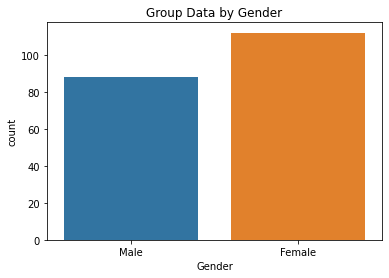

In [9]:
# Plot frequency chart for Gender
plt.figure()
fig = sns.countplot(x='Gender', data=customersDf)
plt.title('Group Data by Gender')

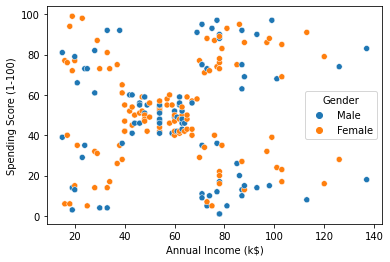

In [10]:
sns.scatterplot( 
    data=customersDf, 
    x='Annual Income (k$)',
    y='Spending Score (1-100)', 
    hue='Gender'
)

In [11]:
# Descriptive statistics for Female
customersDf[ customersDf['Gender'] == 'Female' ].describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,112.000000,112.000000,112.000000
mean,38.098214,59.250000,51.526786
std,12.644095,26.011952,24.114950
min,18.000000,16.000000,5.000000
25%,29.000000,39.750000,35.000000
50%,35.000000,60.000000,50.000000
75%,47.500000,77.250000,73.000000
max,68.000000,126.000000,99.000000


In [12]:
# Descriptive statistics for Male
customersDf[ customersDf['Gender'] == 'Male' ].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,88.000000,88.000000,88.000000
mean,39.806818,62.227273,48.511364
std,15.514812,26.638373,27.896770
min,18.000000,15.000000,1.000000
25%,27.750000,45.500000,24.500000
50%,37.000000,62.500000,50.000000
75%,50.500000,78.000000,70.000000
max,70.000000,137.000000,97.000000


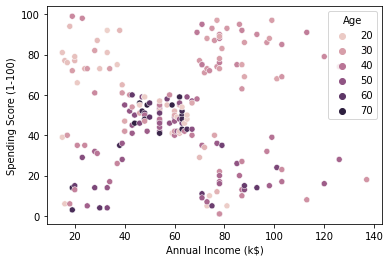

In [13]:
# Group observations by Age
sns.scatterplot( 
    data=customersDf, 
    x='Annual Income (k$)',
    y='Spending Score (1-100)', 
    hue='Age'
)

In [14]:
# Produce a 3D scatter plot
fig = px.scatter_3d(
    customersDf,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='Spending Score (1-100)',
   )

fig.update_traces(marker=dict(size=3))

fig.show()

### Feature Engineering

In [15]:
# Select the features for machine learning
selectedFeatures = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features = customersDf.loc[:, selectedFeatures]

In [16]:
# Apply standaridization
scaler = StandardScaler()
features = scaler.fit_transform( features )

In [17]:
# Preview 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' after Standardization
features[0:10]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002]])

In [18]:
# Instantiate a KMeans ML mode
kMeansML = KMeans( n_clusters = 3 )
kMeansML.fit( features )


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
# Get the labels and centroids
labels = kMeansML.labels_
centroids = kMeansML.cluster_centers_

In [20]:
# Put features into dataframe
featuresDf = pd.DataFrame( 
    features, 
    columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] 
  )
featuresDf.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [21]:
# After the model has learned the parameters, we undo
# the standard scaling
unstandardizedFeatures = scaler.inverse_transform( features )

# Put the labels (customers segments) into a DataFrame
labeledDf = pd.DataFrame( 
    unstandardizedFeatures, 
    columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
  )

# Append the labels 'Customer Segment'
labeledDf['Customer Segment'] = pd.DataFrame( data=labels, columns=['Customer Segment'] )

In [22]:
labeledDf.head()

,Age,Annual Income (k$),Spending Score (1-100),Customer Segment
0,19.0,15.0,39.0,1
1,21.0,15.0,81.0,1
2,20.0,16.0,6.0,1
3,23.0,16.0,77.0,1
4,31.0,17.0,40.0,1


In [23]:
# Find out which cluster number is highest spending, lowest spending, and average spending.
labeledDf.groupby('Customer Segment')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Segment,,,,,,,,
0,45.0,75.577778,19.595325,18.0,72.0,78.0,89.0,97.0
1,64.0,55.812500,22.112178,5.0,42.0,55.0,73.0,99.0
2,91.0,33.703297,18.025596,1.0,15.5,40.0,48.5,60.0


In [24]:
spendingBracket = {
    0: 'High Spending',
    2: 'Avg Spending',
    1: 'Low Spending'
}

In [25]:
labeledDf

,Age,Annual Income (k$),Spending Score (1-100),Customer Segment
0,19.0,15.0,39.0,1
1,21.0,15.0,81.0,1
2,20.0,16.0,6.0,1
3,23.0,16.0,77.0,1
4,31.0,17.0,40.0,1
...,...,...,...,...
195,35.0,120.0,79.0,0
196,45.0,126.0,28.0,0
197,32.0,126.0,74.0,0
198,32.0,137.0,18.0,0


Text(0.5, 1.0, 'Elbow curve')

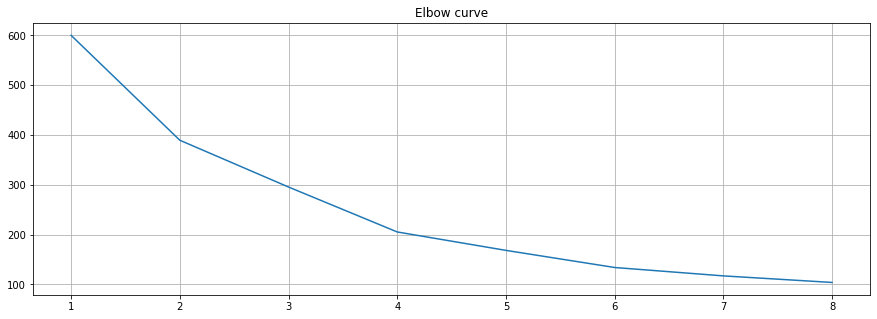

In [28]:
# We'll refer to the dataset as 'X' in the code below, so
# assign 'featuresDf' to 'X'
X = featuresDf

# Distortions will contain the scores for clustering 
distorsions = []

# How many clusters to try to find
rangeOfClusters = [1,2,3,4,5,6,7,8]

for k in rangeOfClusters:

    # Find the score for KMeans for every clusters$
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plotting the Elbow Method for visualization
fig = plt.figure(figsize=(15, 5))
plt.plot(rangeOfClusters, distorsions)
plt.grid(True)
plt.title('Elbow curve')